In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import scipy.optimize as opt # needed for the minimize function

In [3]:
# load data from file using pandas dataframes

path = "D:\Programming\TestData\ex2data1.txt"
data = pd.read_csv(path, header=None, names=['Test1', 'Test2', 'Result'])
data.head()

,Test1,Test2,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
#extract X,y from data
X = data.iloc[:, :-1] # all columns upto last column
y = data.iloc[:, -1]  # last column

print(X.shape)
print(X[:5])
print('\n')
print(y.shape)
print(y[:5])

# X, y are not yet matrices, but values in a dataframe

(100, 2)
       Test1      Test2
0  34.623660  78.024693
1  30.286711  43.894998
2  35.847409  72.902198
3  60.182599  86.308552
4  79.032736  75.344376


(100,)
0    0
1    0
2    0
3    1
4    1
Name: Result, dtype: int64


Text(0, 0.5, 'Test 2')

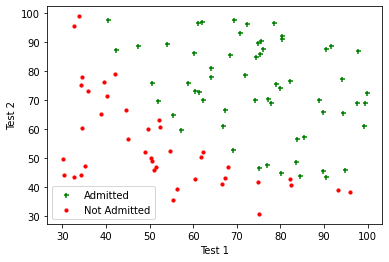

In [5]:
# plot data

#plot positive and negative indices
pos = data['Result'] == 1
neg = data['Result'] == 0

fig, ax = plt.subplots(figsize = (6,4))

ax.scatter(data[pos]['Test1'], data[pos]['Test2'], s=25, c='g', marker = '+', label = 'Admitted')
ax.scatter(data[neg]['Test1'], data[neg]['Test2'], s=10, c='r', marker = 'o', label = 'Not Admitted')

ax.legend()

ax.set_xlabel('Test 1')
ax.set_ylabel('Test 2')

In [6]:
# add intercept term to X i.e. 1's column to X matrix

#X = np.insert(X, 0, 1, axis = 1)
X = np.c_[np.ones((X.shape[0], 1)), X]
# using this method to avoid problems in the matrix multipications within the minimizing function

print(X.shape)
print(X[:5 ]) # first 5 rows of X

(100, 3)
[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]


In [7]:
# converting y to a matrix (m,) => (m,1)

y = y[:, np.newaxis]
# using this method to avoid problems in the matrix multipications within the minimizing function

print(y.shape)
print(y[:5])

(100, 1)
[[0]
 [0]
 [0]
 [1]
 [1]]


In [8]:
def sigmoid(z):
    
    g = 1 / (1 + np.exp(-z))
    
    return g

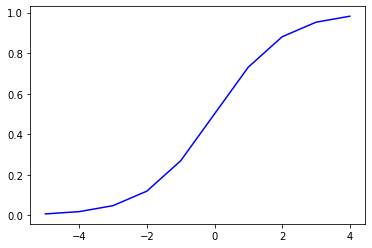

In [9]:
# plot sigmoid function

nums = np.arange(-5,5,step=1)
fig,ax = plt.subplots(figsize=(6,4))

ax.plot(nums, sigmoid(nums),'b')

In [10]:
def costFunction(theta, X, y): # minimizing function expects operands in that order theta...X...y
    
    """
    #X is (m,n+1) / including intercept column of 1s
    #y is (m,1)
    #theta is (n+1,1)  
    """   
    m = X.shape[0]     
    h = sigmoid(np.dot(X, theta)) # X * theta => (m,n+1) * (n+1,1) => (m,1) => y
    Term1 = np.dot(-y.T, np.log(h)) 
    Term2 = np.dot((1-y).T, np.log(1 - h))

    cost = (1/m) * np.sum(Term1 - Term2)
    
    return cost


In [11]:
# test cost function with theta all zeros
theta = np.zeros((X.shape[1],1))
costFunction(theta, X, y) # should return 0.693


0.6931471805599452

In [12]:
def gradient(theta, X, y): # minimizing function expects operands in that order theta...X...y
    
    """
    X is (m,n+1) / including intercept column of 1s
    y is (m,1)
    theta is (n+1,1)        
    """ 
    m = X.shape[0]    
    h = sigmoid(np.dot(X, theta)) # h = X * theta => (m,n+1)*(n+1,1) => (m,1) => y    
    grad = (1/m) * np.dot(X.T, (h-y)) # (n+1,m) * (m,1) =>(n+1,1) => same as theta
            
    return grad # no need to flatten

In [13]:
# test gradient function
gradient(theta, X, y)


array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

In [14]:
# check X, y and theta

print(X[:5])
print(y[:5])
print(theta[:])

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]
[[0]
 [0]
 [0]
 [1]
 [1]]
[[0.]
 [0.]
 [0.]]


In [15]:
# minimize cost function
# we don't run gradient descent, instead we use SciPy's built in Optimization function...
# ...to minimize our costFunction and calculate gradients using our gradient function

initialTheta = np.zeros((X.shape[1],1))

result = opt.fmin_tnc(func = costFunction, x0 = initialTheta, fprime = gradient, args = (X,y.flatten()))

parameters = result[0]

parameters


array([-25.16131863,   0.20623159,   0.20147149])

In [16]:
# minimum cost for computed thete
theta = parameters
minCost = costFunction(theta, X, y)

minCost


0.2034977015894746

In [17]:
# decision boundary
def plotDecisionBoundary(theta, X, y):

    #load the dataset
    path = "D:\Programming\TestData\ex2data1.txt"
    data = np.loadtxt(path, delimiter=',')

    X = data[:, 0:2]
    y = data[:, 2]
    
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    
    plt.scatter(X[pos, 0], X[pos, 1], s=25, c='g', marker = '+', label = 'Admitted')
    plt.scatter(X[neg, 0], X[neg, 1], s=25, c='r', marker = 'o', label = 'Admitted')
    
    plt.xlabel('Test 1 score')
    plt.ylabel('Test 2 score')
    
    plt.title('Scatter plot of training data')
    
    # draw the decision boundary
    # you need 2 points to draw a straight line y = mx+c where m is slope
    plot_X1 = np.array([min(X[:, 0]), max(X[:, 0])])
    plot_X2 = -(theta[0] + theta[1] * plot_X1)/theta[2]
    plt.plot(plot_X1, plot_X2, c='y', label = 'Decision Boundary')
    
    
    #plt.legend(['Decision Boundary', 'Admitted', 'Not Admitted'])
    plt.legend()
    
    plt.show()     
    
    return


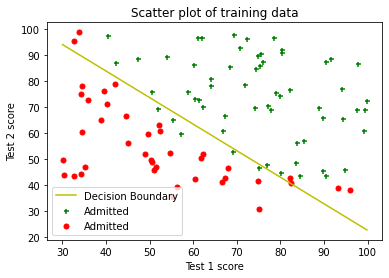

In [18]:
plotDecisionBoundary(theta, X, y)

In [19]:
# predict test
#For a student with an Exam 1 score, of 45 and an Exam 2 score of 85, you should expect to see an admission
# probability of 0.776.

# given Xi = [1 45 85]
# theta (already computed from minimizing function)

Xi = [1, 45, 85]

prediction = sigmoid(np.dot(Xi, theta))
prediction

0.7762906238555608

In [20]:
def predict(theta, X, threshold = 0.5):
    hTheta = sigmoid(np.dot(X, theta))
    p = hTheta >= threshold
    return p.astype('int')

In [21]:
p = predict(theta, X, 0.5)

In [22]:
print('Training Accuracy {}%'.format(100 * sum(p == y.ravel())/p.size))

Training Accuracy 89.0%
